<img src="./caps/utn.jpg" align="right" width="150" /> 
#### Teoría de los Circuitos II - 2021

# Tarea semanal 5
## Verificación utilizando herramientas de simulación.
#### Lauría Juan

<div class="alert alert-block alert-info">
<b>1)</b> Simulación de transferencia pasabajos obtenida.
</div></div>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

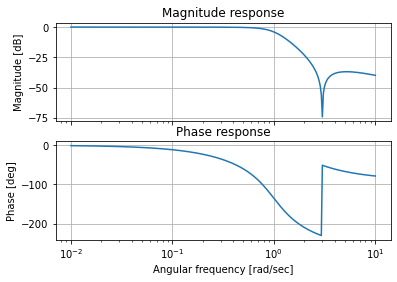

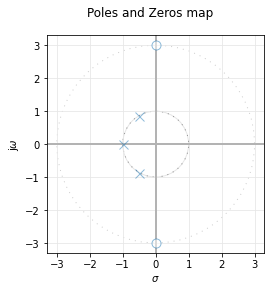

In [1]:
from scipy import signal
from splane import pzmap, grpDelay, bodePlot
from scipy.signal import TransferFunction,bode
import matplotlib.pyplot as plt
import numpy as npy

kk = 1 / 9

transferencia_lp = npy.array([[1,1,1,kk*1,0,kk*9],[0,1,1,0,0,1]])

b,a = signal.sos2tf(transferencia_lp)

tf_lp = TransferFunction(a,b)

## Ploteo.
bodePlot(tf_lp)
pzmap(tf_lp)

<div class="alert alert-block alert-info">
<b>2)</b> Simulación de la transferencia pasa altos.
</div></div>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

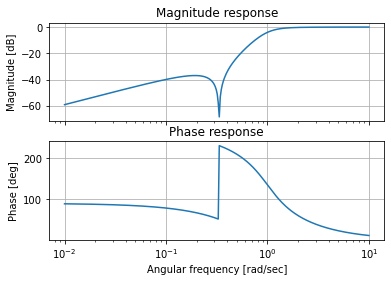

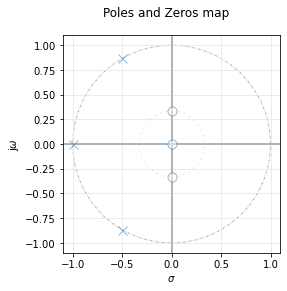

In [2]:
kk2 = 1

transferencia_hp = npy.array([[1,1,1,kk2*1,0,1/9],[0,1,1,0,1,0]])

b,a = signal.sos2tf(transferencia_hp)

tf_hp = TransferFunction(a,b)

## Ploteo.
bodePlot(tf_hp)
pzmap(tf_hp)

<div class="alert alert-block alert-info">
<b>2)</b> Implementación circuital - con error.
</div></div>

Se planteó la transferencia como una cascada de una sección HP de primer orden y un filtro notch de 2do orden. Sin embargo no encontré la manera de acercar los ceros hacia j$\frac{1}{3}$ sin afectar a toda la transferencia. Las simulaciones con los componentes calculados no se corresponden con las esperadas y obtenidas al realizar la transformación en frecuencia.

<img src="./caps/circ.jpg" align="center" width="800" /> 

En el circuito de LTspice si salgo por V2 no obtengo un bode correspondiente a un notch. Si salgo por el terminal Vin(+) de U3 obtengo algo más similar que se corresponde con el simulado en python. Sin embargo el cero de transmisión se encuentra en wo = 1 y no concuerdan con las atenuaciones esperadas.

<img src="./caps/salida.jpg" align="center" width="1200" /> 

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

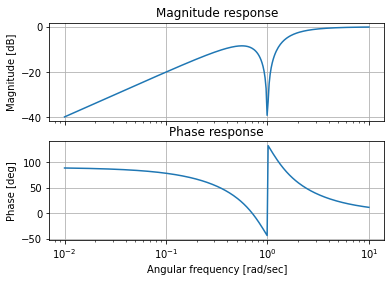

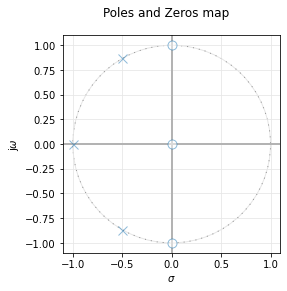

In [3]:
from scipy import signal
from splane import pzmap, grpDelay, bodePlot
from scipy.signal import TransferFunction,bode
import matplotlib.pyplot as plt
import numpy as npy

## HP 1er orden
r_hp = 1
c_hp = 1

k_hp = 1 / (c_hp * r_hp)

## GIC
c_g = 1
r_g = 1
r2_g = 1
r3_g = 1

## Notch 2do orden.
L_n = (r2_g * r_g * r3_g * c_g) / ( r_g)

r_n = 1
c_n = 1

k_n = 1 / (L_n * c_n)

woq_n = 1 / (r_n * c_n)


transferencia_hp = npy.array([[0,1,k_hp*1,0,k_hp*1,0],[1,1*woq_n,1*k_n,1*k_n,0,k_n*1]])

b,a = signal.sos2tf(transferencia_hp)

tf_hp = TransferFunction(a,b)

## Ploteo.
bodePlot(tf_hp)
pzmap(tf_hp)